### <center>Melhorando os Dados e Primeira Exibição</center>

--------

#### Bibliotecas

In [1]:
from minio import Minio
from io import BytesIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Variáveis Locais

In [2]:
# Variáveis MinIO
MINIO_ENDPOINT = "localhost:9000"
MINIO_ACCESS_KEY = "minio"
MINIO_SECRET_KEY = "minio123"
BUCKET_NAME = "xau-lake"

#### Validando a Existência do Bucket

In [3]:
# Selecionando o Timeframe que utilizaremos inicialmente
TIMEFRAME = "1d"

In [4]:
client = Minio(
    MINIO_ENDPOINT,
    access_key=MINIO_ACCESS_KEY,
    secret_key=MINIO_SECRET_KEY,
    secure=False,
)

In [5]:
if not client.bucket_exists(BUCKET_NAME):
    raise RuntimeError(f"Bucket {BUCKET_NAME} não existe. Crie antes no 01_download_raw.")
else:
    print(f"Bucket '{BUCKET_NAME}' encontrado.")

Bucket 'xau-lake' encontrado.


#### Lendo dados Parquet da Silver

In [6]:
silver_key = f"silver/timeframe={TIMEFRAME}/XAU_{TIMEFRAME}_data.parquet"
print("Lendo:", silver_key)

Lendo: silver/timeframe=1d/XAU_1d_data.parquet


In [7]:
response = client.get_object(BUCKET_NAME, silver_key)
data_bytes = response.read()
response.close()
response.release_conn()

In [8]:
df = pd.read_parquet(BytesIO(data_bytes))

In [9]:
print("Shape:", df.shape)

Shape: (5440, 7)


In [10]:
df.head()

,timestamp,open,high,low,close,volume,timeframe
0,2004-06-11,384.0,384.8,382.8,384.1,272,1d
1,2004-06-14,384.3,385.8,381.8,382.8,1902,1d
2,2004-06-15,382.8,388.8,381.1,388.6,1951,1d
3,2004-06-16,387.1,389.8,382.6,383.8,2014,1d
4,2004-06-17,383.6,389.3,383.0,387.6,1568,1d


#### EDA Básico

##### Info Geral

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5440 non-null   datetime64[ns]
 1   open       5440 non-null   float64       
 2   high       5440 non-null   float64       
 3   low        5440 non-null   float64       
 4   close      5440 non-null   float64       
 5   volume     5440 non-null   int64         
 6   timeframe  5440 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 297.6+ KB


##### Estatísticas descritivas

In [12]:
df[["open", "high", "low", "close", "volume"]].describe()

,open,high,low,close,volume
count,5440.000000,5440.000000,5440.000000,5440.000000,5.440000e+03
mean,1371.263678,1381.333717,1361.089719,1371.610057,8.334597e+04
std,585.047204,589.168143,581.376995,585.717935,8.853001e+04
min,382.800000,384.800000,381.100000,382.800000,2.000000e+00
25%,1044.690000,1051.525000,1036.660000,1046.070000,2.532675e+04
50%,1294.205000,1302.335000,1287.525000,1294.115000,7.206050e+04
75%,1729.797500,1742.610000,1717.850000,1729.802500,1.139270e+05
max,3859.310000,3875.570000,3854.530000,3865.880000,1.841972e+06


##### Intervalo de datas

In [13]:
print("Primeira data:", df["timestamp"].min())
print("Última data  :", df["timestamp"].max())

Primeira data: 2004-06-11 00:00:00
Última data  : 2025-10-01 00:00:00


##### Primeira Exibição Gŕafica

In [14]:
df_recent = df[df["timestamp"] >= "2020-01-01"]

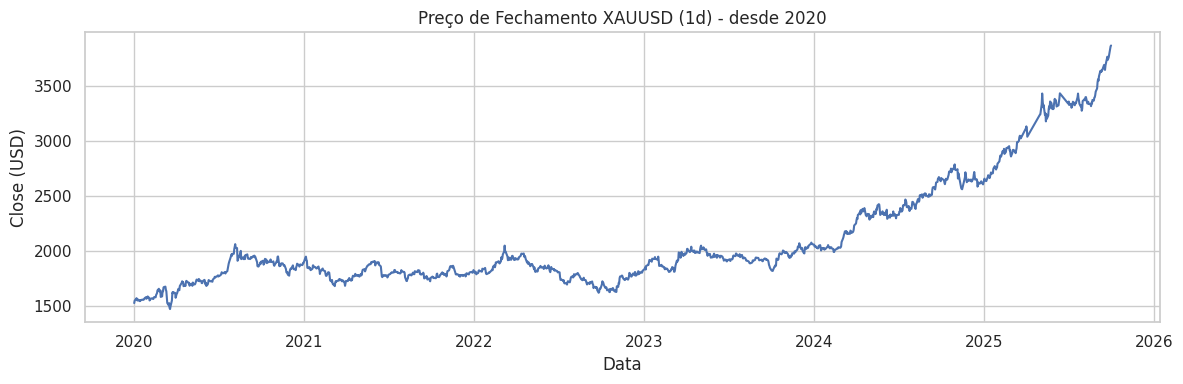

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 4))
sns.lineplot(data=df_recent, x="timestamp", y="close")
plt.title(f"Preço de Fechamento XAUUSD ({TIMEFRAME}) - desde 2020")
plt.xlabel("Data")
plt.ylabel("Close (USD)")
plt.tight_layout()
plt.show()